**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [65]:
# загружаем данные, смотрим содержимое и наличие/количество пропусков
data = pd.read_csv('telecom_users.csv'
                    , index_col='Unnamed: 0')
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6317,7493-TPUWZ,Male,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.15,79.15,Yes
6244,5331-RGMTT,Male,1,Yes,No,54,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.05,5295.7,No
2528,4277-PVRAN,Female,0,No,No,8,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),80.10,679.3,Yes
3080,1777-JYQPJ,Male,0,No,No,2,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,24.30,38.45,No
3186,3457-PQBYH,Female,0,Yes,Yes,58,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.30,1160.75,No


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [67]:
# количество клиентов - уникальных ID, по которым есть записи
data.customerID.nunique()

5986

In [68]:
# переводим TotalCharges в числовой формат 
np.sort(data.TotalCharges.unique())

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

In [69]:
# есть значение ' '; смотрим на MonthlyCharges и tenure по ним
data[data.TotalCharges == ' '][['tenure', 'MonthlyCharges']]

,tenure,MonthlyCharges
6754,0,61.90
1340,0,56.05
3826,0,25.35
5218,0,19.70
3331,0,19.85
936,0,80.85
753,0,20.25
4380,0,20.00
488,0,52.55
1082,0,25.75


In [70]:
# получается, это совсем новые клиенты; по ним в TotalCharges вносим 0
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.TotalCharges.fillna(0, inplace=True)

In [71]:
# переводим SeniorCitizen в object-формат, будем учитывать с категориальными переменными
data.SeniorCitizen = data.SeniorCitizen.map({1: 'Yes', 0: 'No'})

Всего в базе 5986 записей по такому же количеству `customerID` (пользователей), без пропусков.  
20 признаков, распределение по типам: `float64` - 1, `int64` - 2, `object` - 17.  
Целевая переменная `Churn`.

**Основные статистики**, <ins>числовые данные:</ins>

In [72]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2294.221559
std,24.516391,30.114702,2274.164124
min,0.000000,18.250000,0.000000
25%,9.000000,35.650000,401.587500
50%,29.000000,70.400000,1408.575000
75%,56.000000,89.900000,3841.500000
max,72.000000,118.750000,8684.800000


Мода для числовых данных:

In [73]:
for ind in data.describe().keys():
    print(f'{ind}: ', stats.mode(data[ind]))
    print(f'Уникальных значений {ind}: ', data[ind].nunique(), '\n')

tenure:  ModeResult(mode=array([1]), count=array([510]))
Уникальных значений tenure:  73 

MonthlyCharges:  ModeResult(mode=array([20.05]), count=array([50]))
Уникальных значений MonthlyCharges:  1526 

TotalCharges:  ModeResult(mode=array([0.]), count=array([10]))
Уникальных значений TotalCharges:  5611 



Визуализация распределений числовых признаков:

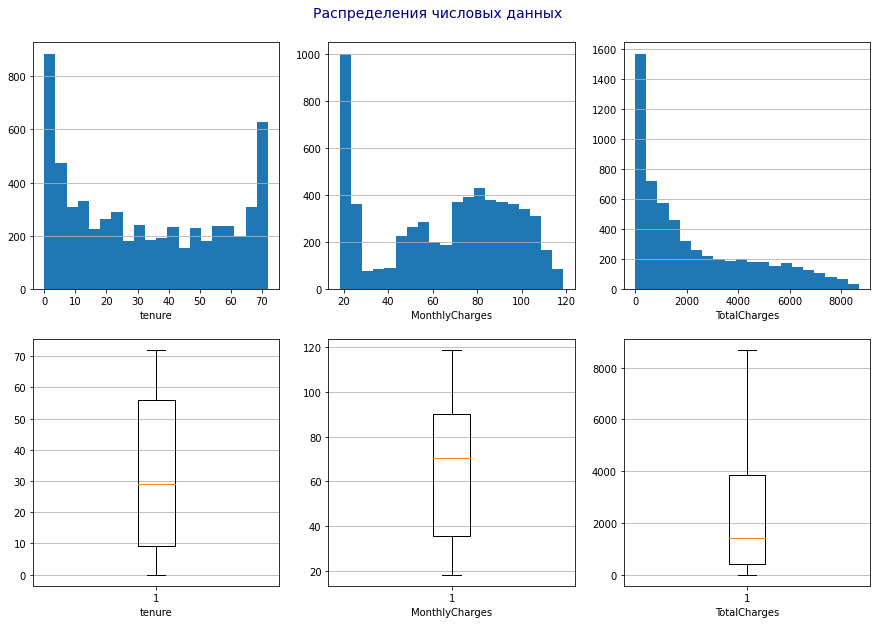

In [74]:
# гистограммы и боксплоты для числовых признаков
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, param in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    axs[0,i].hist(data[param], bins=20)
    axs[0,i].set_xlabel(param)
    axs[1,i].boxplot(data[param])
    axs[1,i].set_xlabel(param)
    axs[0,i].grid(axis='y')
    axs[1,i].grid(axis='y')
plt.suptitle('Распределения числовых данных', color='navy', size=14, y=0.93)
plt.show()

`tenure` - клиентский стаж в месяцах:  
- наибольшее количество пользователей со стажем от 0 до примерно 5 месяцев - около 750 человек, мода 1 месяц (510 человек);  
- вторая по численности группа пользователей со стажем 68-72 месяца - около 630 человек;
- группы пользователей с клиентским стажем от 6 до 67 месяцев с разбивкой на 3.6 (4) месяца - это, в основном, от 200 до 250 человек.  
Минимальное значение 0, максимальное значение 72, среднее 32.5, медиана 29.  

    
`MonthlyCharges` - размер оплаты в месяц:  
- наибольшее количество пользователей платит 18.25-22 в месяц (почти 1000 человек), мода 20.05 (50 человек);  
- значительно меньше вторая по численности группа - пользователи, которые платят примерно 80 в месяц, это около 430 человек;  
- самая малочисленная группа - те, кто платит около 30 в месяц, это около 80 человек;  
Минимальное значение 18.25, максимальное значение 118.75, среднее 64.8, медиана 70.4.  
  
`TotalCharges` - общая сумма оплат клиента за весь период клиентского стажа:  
- наибольшее количество пользователей в целом потратили до 500 (ок. 1550 человек), мода 0 (10 человек) - это те новые клиенты, у которых `tenure` = 0;  
- следующая по затратам группа заметно отстает по численности - 500-1000 потратили ок. 700 человек;  
- по мере возрастания общей суммы затрат клиента численность групп снижается, условное плато можно наблюдать в промежутке 3000-6000 (на уровне 180-200 человек);  
- наиболее "дорогая" группа одновременно самая малочисленная: траты на уровне 8500 примерно у 30 человек.  
Минимальное значение 0, максимальное значение 8684.8, среднее 2294.2, медиана 1408.6.  
  
    
Явных выбросов в числовых признаках нет.


<ins>Категориальные данные:</ins>

In [75]:
data.describe(include=['O'])

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7010-BRBUU,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3050,5020,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


Категориальные данные логично разделить на 4 группы:  
- персональные данные (`gender`, `SeniorCitizen`, `Partner`, `Dependents`);  
- телефонные сервисы (`PhoneService`, `MultipleLines`);  
- интернет-сервисы (`InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`);  
- финансовая информация (`Contract`, `PaperlessBilling`, `PaymentMethod`, `Churn`).

In [76]:
data.describe(include=['O']).keys().values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'], dtype=object)

Визуализация распределений категориальных признаков:

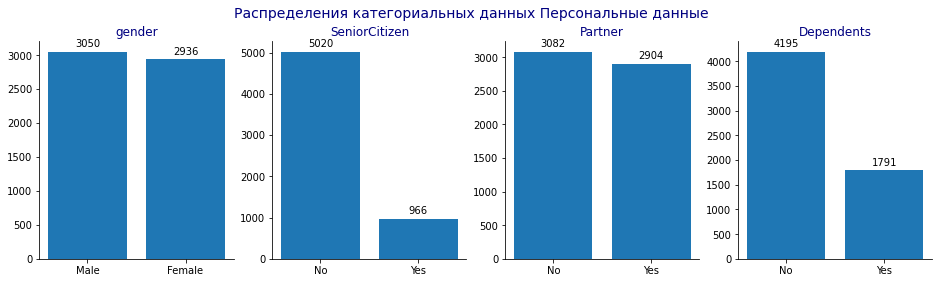

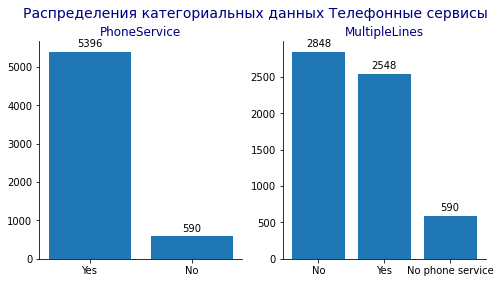

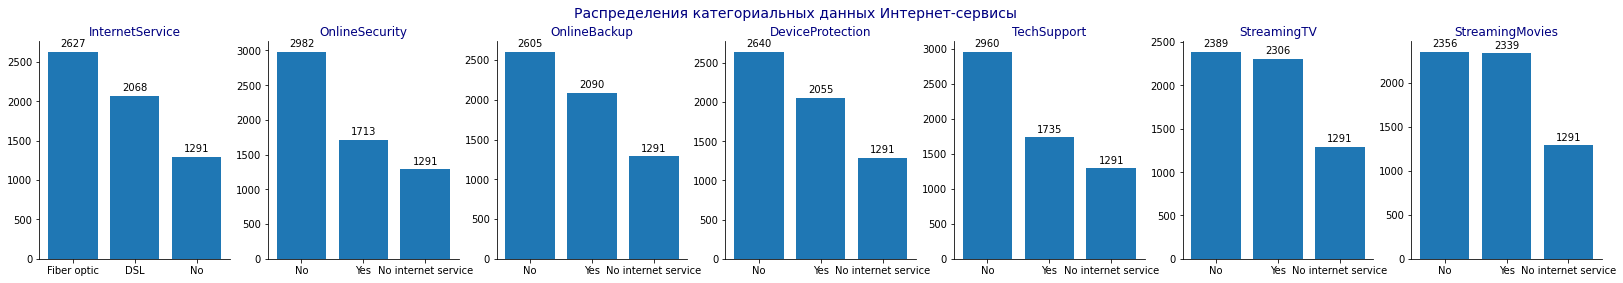

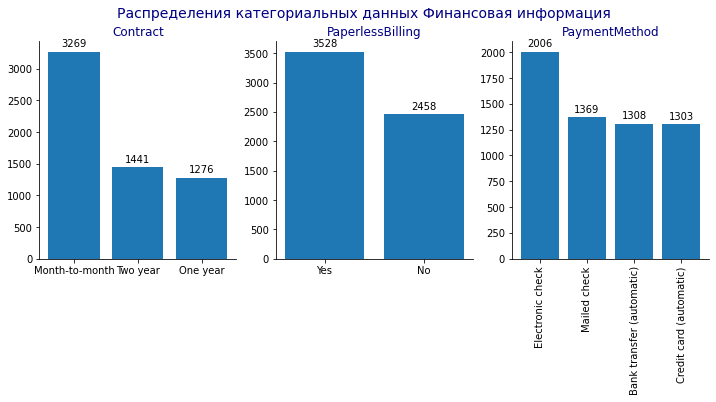

In [77]:
total_dict = {'Персональные данные': data.describe(include=['O']).keys().values[1:5]
              , 'Телефонные сервисы': data.describe(include=['O']).keys().values[5:7]
              , 'Интернет-сервисы': data.describe(include=['O']).keys().values[7:14]
              , 'Финансовая информация': data.describe(include=['O']).keys().values[14:17]}

def autolabel(charts):
    """Подписи значений на bar'ах"""
    for chart in charts:
        height = chart.get_height()
        axs[i].annotate(f'{height}',
                    xy=(chart.get_x() + chart.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

for lst in total_dict:
    fig, axs = plt.subplots(nrows=1, ncols=len(total_dict[lst])
    , figsize=(len(total_dict[lst]) * 4, 4))
    for i, param in enumerate(total_dict[lst]):
        charts = axs[i].bar(x=data[param].value_counts().index        
                     , height=data[param].value_counts().values)
        if param == 'PaymentMethod':
            axs[i].set_xticklabels(labels=data[param].value_counts().index, rotation=90)
        axs[i].set_title(param, color='navy')
        autolabel(charts)
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
    plt.suptitle(f'Распределения категориальных данных {lst}'
                , size=14, color='navy', y=1)
plt.show()

Среди пользователей почти поровну мужчин и женщин, также примерно одинаковое количество состоящих и не состоящих в браке. 30% пользователей содержат иждивенцев.  
16% пользователей - пенсионеры.  

Подавляющее большинство (90%) используют телефонные сервисы, из них почти у половины подключены несколько телефонных линий.  

Интернет-сервисы используют 78% клиентов, доля `Fiber optic` и `DSL` составляет 56% и 44% соответственно. Среди пользователей интернет-сервисов достаточно популярны услуги `StreamingTV` (49%) и `StreamingMovies` (50%). Доля пользователей других предоставляемых интернет-сервисов меньше, но все же значительна: `OnlineSecurity` - 36%,  `OnlineBackup` - 45%, `TechSupport` - 37%.  
44% пользователей интернет-сервисов имеют/оплачивают страховку оборудования.  

Основной тип контракта - `Month-to-month`, такой контракт заключен с 55% пользователей. Сходные доли пользователей имеют контракты `Two year` и `One year` - 24% и 21% соответственно.  
59% пользователей пользуются безбумажным биллингом.  
Методы оплаты: 33% приходится на `Electronic check`, 23% - на `Mailed check`, по 22% - на `Bank transfer (automatic)` и `Credit card (automatic)`.


# 2. Исследование зависимостей и формулирование гипотез

Почему клиент может уйти:  
- не нравится цена, т. е. где-то есть примерно то же самое, но дешевле;  
- не нравится качество, т. е. где-то есть примерно за те же деньги, но лучше / быстрее / бесперебойно / больше / и т. д.;  
- переманили, т. е. клиент находится в средних, массовых условиях обслуживания, в которых находятся и продолжают оставаться другие такие же, а он уходит;  
- ушел использовать принципиально другие услуги; 
- перестал быть клиентом - умер или уехал;  
- произошли какие-то другие внешние события, повлиявшие на клиента.

Оценивать стоимость услуг мы можем только в пределах имеющихся данных. В качестве "опорной точки" стоимости услуг будем рассматривать среднюю ежемесячную плату, рассчитанную по группам с одинаковым набором услуг. Для этого вводим новую переменную `MeanCharges`.  Для того, чтобы оценить, выросла ли стоимость услуг для каждого пользователя, введем переменную `GrowthCharges` = `MonthlyCharges` - `TotalCharges` / `tenure`.

"Не нравится качество", "переманили", "ушел использовать другие услуги" в имеющихся данных можно рассматривать вместе. Возможно, в группах с какими-то сочетаниями услуг отток больше (или, наоборот, меньше). 

"Перестал быть клиентом" - рассмотрим отток в разных демографических группах.  

"Другие внешние события" - другие возможные зависимости.



In [78]:
mean_charges_data = data.groupby(['PhoneService', 'MultipleLines'
            , 'OnlineSecurity', 'OnlineBackup'
            , 'DeviceProtection', 'TechSupport'
            , 'StreamingTV', 'StreamingMovies'])['MonthlyCharges', 'customerID']\
            .agg({'MonthlyCharges': 'mean', 'customerID': lambda x: x + ''})\
            .reset_index()[['MonthlyCharges', 'customerID']]\
            .explode('customerID').reset_index()
mean_charges_data.rename(columns={'index': 'customerGroup', 'MonthlyCharges': 'MeanCharges'}, inplace=True)
data = data.merge(mean_charges_data, how='inner', on='customerID')
data['GrowthCharges'] = data['MonthlyCharges'] - data['TotalCharges'] / data['tenure']
data['GrowthCharges'].fillna(0, inplace=True)

In [79]:
# кодируем целевую переменную
from sklearn.preprocessing import LabelEncoder

enc_y = LabelEncoder()

data['Churn'] = enc_y.fit_transform(data['Churn'].values)

enc_y.classes_

array(['No', 'Yes'], dtype=object)

Строим pairplot для числовых признаков (это финансовые и временные показатели):

In [80]:
import seaborn as sns

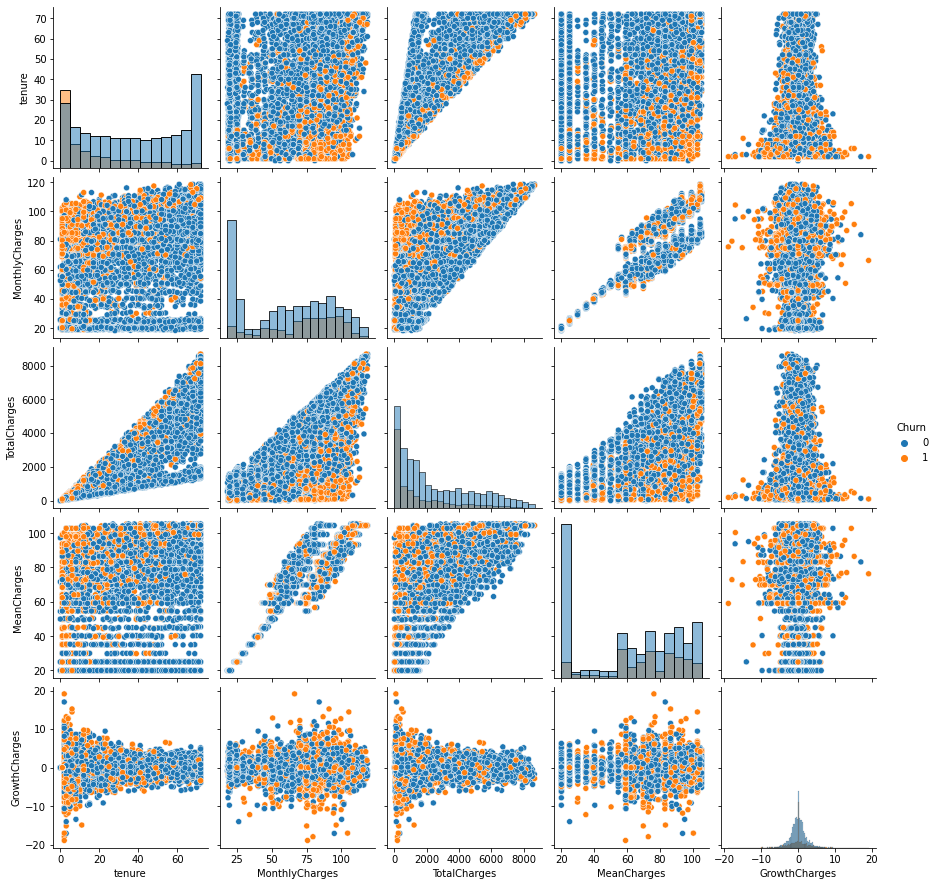

In [81]:
num_data = data[['tenure', 'MonthlyCharges', 'TotalCharges'
                , 'MeanCharges', 'GrowthCharges', 'Churn']]
sns.pairplot(num_data, hue='Churn', diag_kind='hist');

Выделяется зона риска оттока клиентов:  `tenure` от 0 до 5 месяцев.

При этом зона устойчивости - это дешевые тарифы (`MonthlyCharges` = 20-25) при `tenure` больше 5 месяцев.  
Также отметим лояльную часть клиентской базы: с увеличением клиентского стажа `tenure` уровень `MonthlyCharges`, при котором сохраняется небольшой отток, возрастает c 20 до 80 (похожая ситуация с `TotalCharges`).  

По `MeanCharges`: также выделяется лояльная часть базы - на значениях `tenure` от 10 до 72 месяцев уровень `MeanCharge`, при котором сохраняется небольшой отток, возрастает с 10 до 90. Зона устойчивости - невысокая среднемесячная стоимость услуг на уровне 20-25 при `tenure` примерно с 7 месяцев.  
Расхождения между `MonthlyCharges` и `MeanCharges` начинаются на уровне 50, и разница между значениями `MonthlyCharges` для одного значения `MeanCharges` достигает 100, т. е. колебания `MonthlyCharges` внутри группы с одинаковым набором услуг весьма значительны. Наблюдается увеличение оттока при `MonthlyCharges` > `MeanCharges`:



In [82]:
print('Отток при MonthlyCharges > MeanCharges: ', data[data.MonthlyCharges > data.MeanCharges].Churn.sum())
print('Отток при MonthlyCharges <= MeanCharges: ', data[data.MonthlyCharges <= data.MeanCharges].Churn.sum())

Отток при MonthlyCharges > MeanCharges:  1188
Отток при MonthlyCharges <= MeanCharges:  399


`GrowthCharges` имеет почти нормальное распределение на промежутке [-10, 10], и распределение оттока сходно с нормальным.



Теперь рассмотрим категориальные данные, а именно соотношение числа оставшихся и ушедших клиентов в разрезе групп с одинаковым набором услуг.


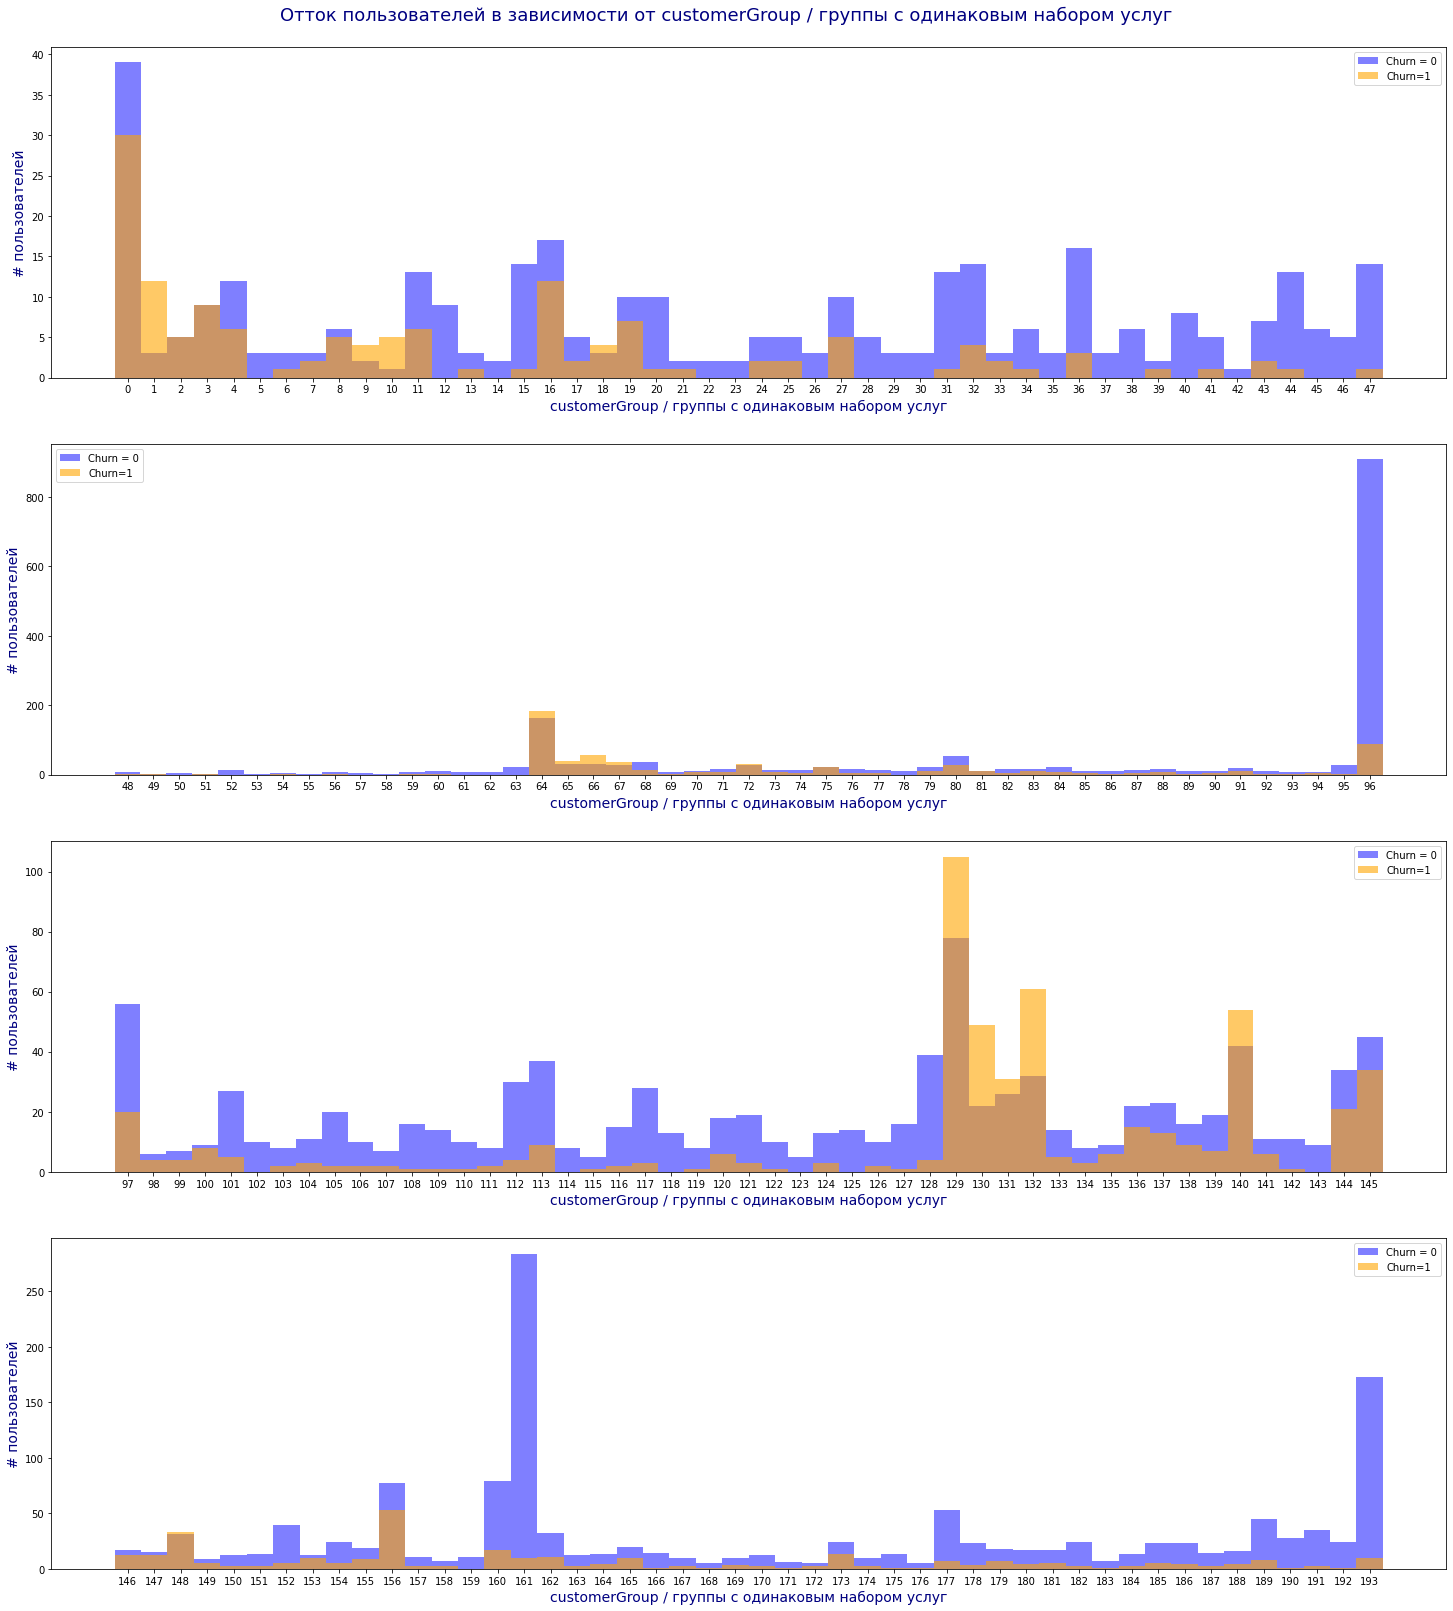

In [83]:
group_data = data.groupby('customerGroup')['customerID', 'Churn']\
    .agg({'customerID': 'count', 'Churn': 'sum'})

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(25, 28))
for i in range(4):
    low = round((data.customerGroup.nunique() / 4) * i)
    top = round((data.customerGroup.nunique() / 4) * (i + 1))
    axs[i].bar(x=group_data[low:top].index
        , height=group_data[low:top].customerID - group_data[low:top].Churn
        , width=1, color='blue', alpha=.5
        , tick_label=group_data[low:top].index
        , label='Churn = 0')
    axs[i].bar(x=group_data[low:top].index
        , height=group_data[low:top].Churn
        , width=1, color='orange', alpha=.6
        , label='Churn=1')
    axs[i].legend()
    axs[i].set_xlabel('customerGroup / группы с одинаковым набором услуг'
        , fontsize=14, color='navy')
    axs[i].set_ylabel('# пользователей', fontsize=14, color='navy')
plt.suptitle('Отток пользователей в зависимости от customerGroup / группы с одинаковым набором услуг'
    , y=0.9, fontsize=18, color='navy')
plt.show()


Видим, что есть группы-"победители", - это группы, в которых отток или отсутствует (например, 12, 45, 46), или доля ушедших пользователей достаточно мала (например, 161, 96).  
Есть группы, в которых зафиксирован существенный отток (24, 27, 97 и т. д.), и есть "провальные" группы - такие, в которых отток от 50% пользователей (например, 9, 10, 64-67, 129-132). 

Переходим к демографическим показателям. 
К ним относятся `gender`, `SeniorCitizen`, `Partner`, `Dependents`.

In [84]:
def yes_counter(series):
    """Считает количество значений 'Yes' в series"""
    series_2 = series.map({'No': 0, 'Yes': 1})
    s = series_2.sum()
    return s

demographics = data.groupby(['gender', 'Churn'])\
    ['SeniorCitizen', 'Partner', 'Dependents', 'Churn']\
    .agg(yes_counter).reset_index()
demographics

,gender,Churn,SeniorCitizen,Partner,Dependents
0,Female,0,276,1160,725
1,Female,1,206,276,141
2,Male,0,288,1168,785
3,Male,1,196,300,140


Здесь мы видим почти равное распределение по полу и почти равное распределение оттока внутри групп `SeniorCitizen`, `Partner`, `Dependents`. Наибольший процент оттока - в группе пенсионеров.
На графиках указаны проценты оттока в каждой демографической группе:

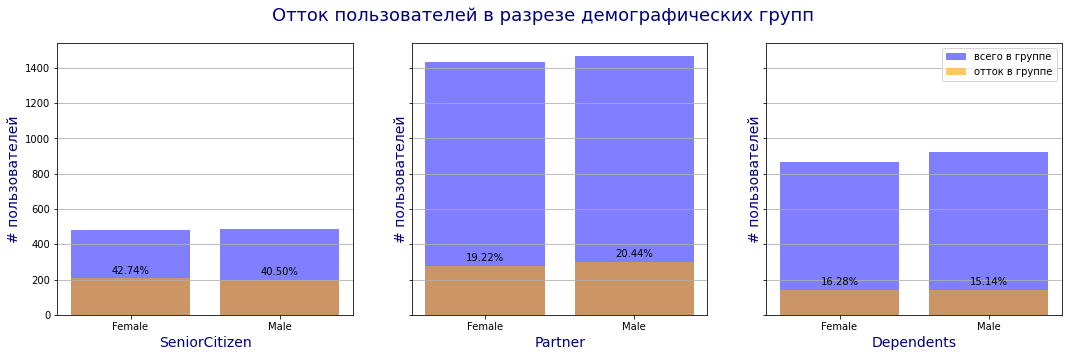

In [85]:
def autolabel_percent(charts_0, charts_1):
    """Подписи процентов на bar'ах"""
    for chart_0, chart_1 in zip(charts_0, charts_1):
        height_0 = chart_0.get_height()
        height_1 = chart_1.get_height()
        axs[i].annotate(f'{(height_1 / height_0) * 100:.2f}%',
                    xy=(chart_1.get_x() + chart_1.get_width() / 2, height_1),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(18, 5))

for i, name in enumerate(['SeniorCitizen', 'Partner', 'Dependents']):
    charts_gen = axs[i].bar(x=['Female', 'Male']
        , height=[demographics[demographics.gender == 'Female'][name].sum()
        , demographics[demographics.gender == 'Male'][name].sum()]
        , color='blue', alpha=.5, label='всего в группе')
    charts_churn = axs[i].bar(x=['Female', 'Male']
        , height=[demographics[(demographics.Churn == 1) & (demographics.gender == 'Female')][name].values[0]
        , demographics[(demographics.Churn == 1) & (demographics.gender == 'Male')][name].values[0]]
        , color='orange', alpha=.6, label='отток в группе')
    autolabel_percent(charts_gen, charts_churn)
    axs[i].set_xlabel(name, fontsize=14, color='navy')
    axs[i].set_ylabel('# пользователей', fontsize=14, color='navy')
    axs[i].grid(axis='y')
plt.suptitle('Отток пользователей в разрезе демографических групп', fontsize=18, color='navy')
plt.legend()
plt.show()

Такая симметричность в демографических группах вряд ли образовалась в клиентской базе естественным путем. Скорее всего, из общей клиентской базы было отобрано определенное число пользователей из каждой демографической группы. Видимо, таким же искусственным путем в каждой демографической группе выбирались те пользователи, у которых `Churn` = 1.

Рассмотрим показатели организационного характера: `Contract`, `PaperlessBilling`, `PaymentMethod`.

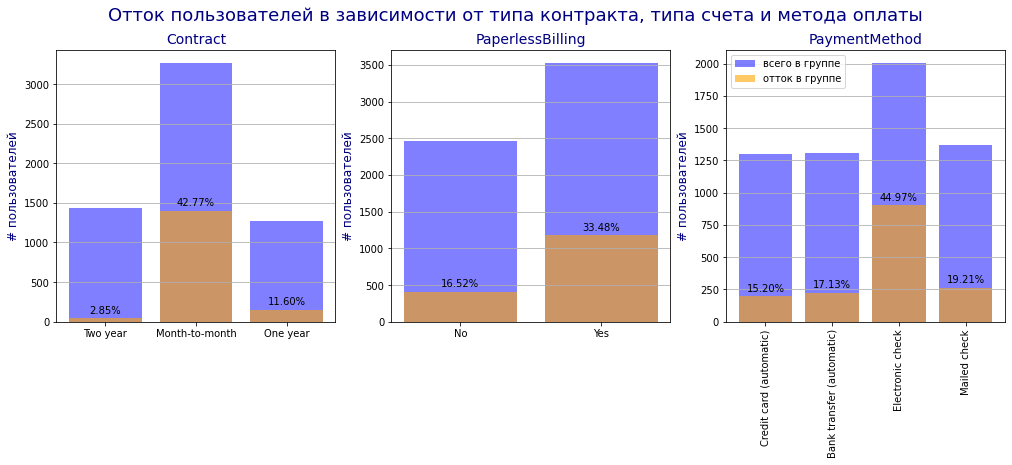

In [86]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

for i, feature in enumerate(['Contract', 'PaperlessBilling', 'PaymentMethod']):
    xticklabels = []
    for j, var in enumerate(data[feature].unique()):
        charts_gen = axs[i].bar(x=var
                   , height=data[data[feature] == var]['customerID'].count()
                   , color='blue', alpha=.5, label='всего в группе')
        charts_churn = axs[i].bar(x=var
                   , height=data[(data[feature] == var) & (data.Churn == 1)]['customerID'].count()
                   , color='orange', alpha=.6, label='отток в группе')
        autolabel_percent(charts_gen, charts_churn)
        xticklabels.append(var)
        if i == 2:
            axs[i].set_xticklabels(labels=xticklabels, rotation=90)
            if j == 0:
                axs[i].legend()
    
    axs[i].set_ylabel('# пользователей', fontsize=12, color='navy')
    axs[i].set_title(feature, fontsize=14, color='navy')
    axs[i].grid(axis='y')
plt.suptitle('Отток пользователей в зависимости от типа контракта, типа счета и метода оплаты'
            , fontsize=18, color='navy', y=1)
plt.show()
    

Пользователю легче всего прекратить контракт продолжительностью в месяц - скорее всего, здесь подразумевается распространенная ситуация ежемесячных одинаковых (или с возможными изменениями не чаще, чем в месяц и т. п.) счетов. Типы контрактов `One year` и `Two year` очевидно удерживают пользователей; вероятно, имеют место определенные финансовые условия, например, предоплата за какой-то период (ежеквартальные платежи, оплата за год вперед и т. д.) или ежемесячные платежи заметно меньшего размера, чем при `Month-to-month`.  

Среди пользователей безбумажного биллинга отток больше почти в 2 раза. Бумажные счета, как правило, используются в двух случаях:  
- человек пользуется услугами давно, со времен большого распространения именно бумажных счетов/биллинга, привык к такому порядку и ничего не меняет;  
- бумажный биллинг нужен для учета затрат и/или проведения платежей - либо своя таким образом выстроенная система у пользователя, либо такой учет связан с участием в оплатах третьих лиц.  

По методам оплаты: наименьший отток наблюдается при автоматическом списании средств, чуть больше - среди тех пользователей, которые отправляют чек по почте. Наибольший отток в случае электронных чеков.

# 3. Построение моделей для прогнозирования оттока

Здесь нужно решить задачу бинарной классификации.  

Будем рассматривать модели:

- KNeighborsClassifier: будем рассматривать как базовый алгоритм, размер датасета позволяет его использовать; 
- DecisionTreeClassifier: схема "если - то" вполне применима на наших данных;
- RandomForestClfssifier: сравним результаты с DecisionTreeClassifier, RandomForest более устойчив к переобучению;
- LogisticRegression: линейность (или почти линейность) зависимостей у нас наблюдалась в показателях оттока в различных customerGroup, в наличии и характере лояльной части клиентской базы;
- SVC: по тем же соображениям, что и LogisticRegression + при использовании полиномиальных признаков гиперплоскость может быть "гибче" и точность модели может быть выше, чем Linear Regression.  

Оценка качества модели. Датасет несбалансирован, отток составляет 1587 человек, это 26.5% всех записей (KNeighborsClassifier вероятнее всего даст не вполне хороший результат на таких данных, но проверим).  
В данном случае (0 - пользователь остался, 1 - ушел) нам нужно минимизировать ложноотрицательные результаты; следовательно, основной метрикой будет `recall`. Также будем проверять `roc_auc` и справочно смотреть `accuracy`.

Предварительная обработка данных:  
- для кодировки номинальных признаков для DecisionTreeClassifier и KNeighborsClassifier используем OrdinalEncoder;  
- для кодировки номинальных признаков для LogisticResearch и SVC используем OneHotEncoder;  
- для масштабирования данных для LinearRegression используем StandardScaler;  
- для масштабирования данных для SVC используем MinMaxScaler.



In [87]:
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)
from sklearn.preprocessing import (OrdinalEncoder, 
                                   OneHotEncoder,
                                   MinMaxScaler,
                                   StandardScaler)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression                                   
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

In [88]:
# из данных убираем признаки customerID и customerGroup, выделяем целевую переменную
data_X = data.drop(columns=['customerID', 'customerGroup', 'Churn'])
data_y = data.Churn.values
X_train_pre, X_test_pre, y_train, y_test = train_test_split(data_X, data_y, random_state=17)
print('Размер X_train_pre: ', X_train_pre.shape)
print('Размер X_test_pre: ', X_test_pre.shape)

Размер X_train_pre:  (4489, 21)
Размер X_test_pre:  (1497, 21)


In [89]:
# кодировка для DecisionTreeClassifier и KNeighborsClassifier
ord_enc = OrdinalEncoder()

X_train_num_ord = X_train_pre[data_X.describe().columns].values
X_train_cat_ord = ord_enc.fit_transform(X_train_pre[data_X.describe(include=['O']).columns].values)
X_train_ord = np.hstack((X_train_num_ord, X_train_cat_ord))
print('Размер X_train_ord: ', X_train_ord.shape)

X_test_num_ord = X_test_pre[data_X.describe().columns].values
X_test_cat_ord = ord_enc.transform(X_test_pre[data_X.describe(include=['O']).columns].values)
X_test_ord = np.hstack((X_test_num_ord, X_test_cat_ord))
print('Размер X_test_ord: ', X_test_ord.shape)

# кодировка для LogisticResearch и SVC
one_enc = OneHotEncoder(sparse=False)

X_train_num_one = X_train_pre[data_X.describe().columns].values
X_train_cat_one = one_enc.fit_transform(X_train_pre[data_X.describe(include=['O']).columns].values)
X_train_one = np.hstack((X_train_num_one, X_train_cat_one))
print('Размер X_train_one: ', X_train_one.shape)

X_test_num_one = X_test_pre[data_X.describe().columns].values
X_test_cat_one = one_enc.transform(X_test_pre[data_X.describe(include=['O']).columns].values)
X_test_one = np.hstack((X_test_num_one, X_test_cat_one))
print('Размер X_test_one: ', X_test_one.shape)

# масштабирование для LinearRegression - StandardScaler
sts = StandardScaler()
X_train_one_s = sts.fit_transform(X_train_one)
X_test_one_s = sts.transform(X_test_one)

# масштабирование для SVC - MinMaxScaler
mms = MinMaxScaler()
X_train_one_m = mms.fit_transform(X_train_one)
X_test_one_m = mms.transform(X_test_one)

Размер X_train_ord:  (4489, 21)
Размер X_test_ord:  (1497, 21)
Размер X_train_one:  (4489, 48)
Размер X_test_one:  (1497, 48)


In [93]:
# создаем экземпляры классов моделей и задаем сетки параметров
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': list(range(1, 6))
            , 'weights': ['uniform', 'distance']}

dtc = DecisionTreeClassifier(random_state=17)
dtc_params = {'max_depth': list(range(2, 5)), 
              'class_weight': [{0: x, 1: y} for x in np.arange(0.4, 1.1, 0.2) for y in range(2, 10)]}

rfc = RandomForestClassifier(random_state=17)
rfc_params = {'n_estimators': list(range(50, 400, 50))
            , 'max_depth': list(range(2, 5))
            , 'class_weight': [{0: x, 1: y} for x in np.arange(0.4, 1.1, 0.2) for y in range(2, 10)]}

lr = LogisticRegression(random_state=17, penalty='l2', solver='liblinear')
lr_params = {'C': np.arange(0.1, 1.1, 0.1), 'max_iter': [x * 50 for x in range(1, 5)]
            , 'class_weight': [{0: x, 1: y} for x in np.arange(0.4, 1.1, 0.2) for y in range(2, 10)]}

svc = SVC(random_state=17, kernel='poly', probability=True)
svc_params = {'C': np.arange(0.1, 1.1, 0.1)
            , 'degree': list(range(1, 4))
            , 'max_iter': [x * 50 for x in range(6, 11)]}

In [94]:
# находим лучшие параметры моделей с помощью GridSearchCV
result = pd.DataFrame(columns=['model'
                            ,  'accuracy_best_score_cv'
                            , 'recall_train'
                            , 'recall_test'
                            , 'roc_auc_train'
                            , 'roc_auc_test'])
bestparams = {}
estims = [(knn, knn_params, X_train_ord, X_test_ord)
        , (dtc, dtc_params, X_train_ord, X_test_ord)
        , (rfc, rfc_params, X_train_ord, X_test_ord)
        , (lr, lr_params, X_train_one_s, X_test_one_s)
        , (svc, svc_params, X_train_one_m, X_test_one_m)]
for i, (estim, estim_params, X_train, X_test) in enumerate(estims):
    gs_estim = GridSearchCV(estim, estim_params, scoring='recall', cv=skf)
    gs_estim.fit(X_train, y_train)
    result.loc[i, 'model'] = gs_estim.best_estimator_
    result.loc[i, 'accuracy_best_score_cv'] = gs_estim.best_score_
    y_train_pred = gs_estim.predict(X_train) 
    result.loc[i, 'recall_train'] = recall_score(y_train, y_train_pred)
    y_test_pred = gs_estim.predict(X_test)
    result.loc[i, 'recall_test'] = recall_score(y_test, y_test_pred)
    y_train_auc = gs_estim.predict_proba(X_train)[:, 1]
    result.loc[i, 'roc_auc_train'] = roc_auc_score(y_train, y_train_auc)
    y_test_auc = gs_estim.predict_proba(X_test)[:, 1]
    result.loc[i, 'roc_auc_test'] = roc_auc_score(y_test, y_test_auc)
    bestparams[gs_estim.best_estimator_] = gs_estim.best_params_
    print(gs_estim.best_estimator_)
    print(f'best_params: {gs_estim.best_params_}'
        , f'best_score (accuracy): {gs_estim.best_score_}'
        , f'recall_train: {recall_score(y_train, y_train_pred)}'
        , f'recall_test: {recall_score(y_test, y_test_pred)}'
        , '-------------------', sep='\n', end='\n\n')
    

KNeighborsClassifier(n_neighbors=3)
best_params: {'n_neighbors': 3, 'weights': 'uniform'}
best_score (accuracy): 0.45145228215767635
recall_train: 0.6365145228215767
recall_test: 0.47643979057591623
-------------------

DecisionTreeClassifier(class_weight={0: 0.4, 1: 9}, max_depth=3,
                       random_state=17)
best_params: {'class_weight': {0: 0.4, 1: 9}, 'max_depth': 3}
best_score (accuracy): 0.9817427385892117
recall_train: 0.9875518672199171
recall_test: 0.9842931937172775
-------------------

RandomForestClassifier(class_weight={0: 0.4, 1: 9}, max_depth=2,
                       n_estimators=50, random_state=17)
best_params: {'class_weight': {0: 0.4, 1: 9}, 'max_depth': 2, 'n_estimators': 50}
best_score (accuracy): 0.9991701244813278
recall_train: 1.0
recall_test: 1.0
-------------------

LogisticRegression(C=0.1, class_weight={0: 0.4, 1: 9}, max_iter=50,
                   random_state=17, solver='liblinear')
best_params: {'C': 0.1, 'class_weight': {0: 0.4, 1: 9}, 'ma

# 4. Сравнение качества моделей 

Отобранные параметры для обученных моделей:

In [95]:
for item in bestparams.items():
    print(item, end='\n\n')

(KNeighborsClassifier(n_neighbors=3), {'n_neighbors': 3, 'weights': 'uniform'})

(DecisionTreeClassifier(class_weight={0: 0.4, 1: 9}, max_depth=3,
                       random_state=17), {'class_weight': {0: 0.4, 1: 9}, 'max_depth': 3})

(RandomForestClassifier(class_weight={0: 0.4, 1: 9}, max_depth=2,
                       n_estimators=50, random_state=17), {'class_weight': {0: 0.4, 1: 9}, 'max_depth': 2, 'n_estimators': 50})

(LogisticRegression(C=0.1, class_weight={0: 0.4, 1: 9}, max_iter=50,
                   random_state=17, solver='liblinear'), {'C': 0.1, 'class_weight': {0: 0.4, 1: 9}, 'max_iter': 50})

(SVC(C=0.1, degree=1, kernel='poly', max_iter=500, probability=True,
    random_state=17), {'C': 0.1, 'degree': 1, 'max_iter': 500})



Сводные оценки качества моделей:

In [96]:
result

,model,accuracy_best_score_cv,recall_train,recall_test,roc_auc_train,roc_auc_test
0,KNeighborsClassifier(n_neighbors=3),0.451452,0.636515,0.47644,0.912742,0.73084
1,"DecisionTreeClassifier(class_weight={0: 0.4, 1...",0.981743,0.987552,0.984293,0.819696,0.792165
2,"(DecisionTreeClassifier(max_depth=2, max_featu...",0.99917,1.0,1.0,0.828255,0.805164
3,"LogisticRegression(C=0.1, class_weight={0: 0.4...",0.978423,0.982573,0.981675,0.845771,0.831684
4,"SVC(C=0.1, degree=1, kernel='poly', max_iter=5...",0.926141,0.915353,0.903141,0.818174,0.807818


Модель KNeighborsKlassifier не сработала: наблюдается относительно небольшая эффективность на train-выборке и переобучение.  

Лучшие результаты по `recall` дает RandomFaorestClassifier, по `roc_auc` - LogisticRegression. 

Скорее всего, можно доработать параметры для SVC, для достижения лучшего результата. Но она обучается дольше остальных + более простые модели здесь вполне результативны.